# About Pens and Printers

## Pens and Printers
- Pens and Printers was founded in 1984 and provides high quality office products to large organizations. We are a trusted provider of everything from pens and notebooks to desk chairs and monitors. We don’t produce our own products but sell those made by other companies.
- We have built long lasting relationships with our customers and they trust us to provide them with the best products for them. As the way in which consumers buy products is changing, our sales tactics have to change too. Launching a new product line is expensive and we need to make sure we are using the best techniques to sell the new product effectively. The best approach may vary for each new product so we need to learn quickly what works and what doesn’t.

## New Product Sales Methods 
- Six weeks ago we launched a new line of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens and sticky notes. 
- Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two.
- Email: Customers in this group received an email when the product line was launched, and a further email three weeks later. This required very little work for the team.
- Call: Customers in this group were called by a member of the sales team. On average members of the team were on the phone for around thirty minutes per customer.
- Email and call: Customers in this group were first sent the product information email, then called a week later by the sales team to talk about their needs and how this new product may support their work. The email required little work from the team, the call was around ten minutes per customer.

# Requirements

## Guide to Analysis Projects
1. I would like you to create a written report to summarize the analysis you have
performed and your findings. The report will be read by me (Head of Analysis). The list
below describes what I expect to see in your written report.
1. You will need to use a DataLab workbook to write up your findings and share visualizations.
1. You must use the data provided for the analysis.
1. You will also need to prepare and deliver a presentation. You should prepare around 8-10 slides to present to the sales rep. The list below describes what they expect to see in your presentation.
1. Your presentation should be no longer than 10 minutes. 
## Written Report 
Your written report should include written text summaries and graphics of the following:
1. Data validation:
    - Describe validation and cleaning steps for every column in the data
1. Exploratory Analysis to answer the customer questions ensuring you include:
    - Two different types of graphic showing single variables only
    - At least one graphic showing two or more variables
    - Description of your findings
1. Definition of a metric for the business to monitor
    - How should the business monitor what they want to achieve?
    - Estimate the initial value(s) for the metric based on the current data?
1. Final summary including recommendations that the business should undertake
## Presentation
You will give an overview presentation to the sales rep who requested the work. The
presentation should include:
1. An overview of the project and business goals
1. A summary of the work you undertook and how this addresses the problem
1. Your key findings including the metric to monitor and current estimation
1. Your recommendations to the business

# Technical report

In [1]:
%%capture
!pip install fancyimpute
from fancyimpute import IterativeImputer
import matplotlib.pyplot  as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from scipy.stats import skew
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from uuid import UUID
import warnings

warnings.filterwarnings('ignore')

## utility functions

In [2]:
def sep():
    """"A utility function that prints a visual separator in the console to improve readability of outputs."""
    print("\n"+"+"+"-"*78+"+", sep="\n", end="\n\n")

## Define constants for validation
FOUNDATION_YEAR = 1984
YEAR_CONDUCTED = 2024
VALID_METHODS = {"Call", "Email + Call", "Email"}
VALID_STATES = {"Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", 
                "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", 
                "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", 
                "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", 
                "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
                "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", 
                "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"}


def validation(df):
    """
    Perform validation checks on the dataset.
    This function ensures that columns have valid types, non-null values, 
    and contain valid data ranges. Additionally, categorical columns are 
    checked against a set of valid values.
    
    Args:
    df (pandas.DataFrame): The dataset to validate.
    
    Raises:
    AssertionError: If any validation check fails.
    """

    ## Validate the 'week' column
    week = df["week"]
    has_null(week) # Check for missing_values
    valid_range(week, lower=1, upper=6) # Ensure week values are between 1 and 6
    valid_type(week, np.int64) # Ensure the column type is integer

    ##  # Validate the 'sales_method' column
    sales_method = df["sales_method"]
    has_null(sales_method)
    assert VALID_METHODS.issuperset(sales_method.unique()), "`sales_method` column has invalid values" # Validate sales_methods
    valid_type(sales_method, np.object_)

    ## Validate the 'customer_id' column
    customer_id = df["customer_id"]
    has_null(customer_id)
    valid_type(customer_id, np.object_)

    ## Validate the 'nb_sold' column
    nb_sold = df["nb_sold"]
    has_null(nb_sold)
    valid_type(nb_sold, np.int64)
    valid_range(nb_sold, lower=1)

    revenue = df["revenue"]
    has_null(revenue)
    valid_type(revenue, np.int64, np.float64)
    valid_range(revenue, lower=1)

    years_as_customer = df["years_as_customer"]
    has_null(years_as_customer)
    valid_type(years_as_customer, np.int64)
    valid_range(years_as_customer, 0, (YEAR_CONDUCTED - FOUNDATION_YEAR))

    nb_site_visits = df["nb_site_visits"]
    has_null(nb_site_visits)
    valid_type(nb_site_visits, np.int64)
    valid_range(nb_site_visits, lower=0)

    state = df["state"]
    has_null(state)
    assert VALID_STATES.issuperset(state.unique()), "`state` column has invalid values"  # Validate state names
    print("All tests were passed!.")
    
def has_null(s):
    """
    Check if the Series contains any null values.
    
    Args:
    s (pandas.Series): The series to check.
    
    Raises:
    AssertionError: If the series contains any null values.
    """
    has_null = s.isna().sum()
    if s.isna().sum():
        raise AssertionError(f"`{s.name}` column has missing values")

def valid_type(s, *types):
    """
    Check if the Series is of a valid type.
    
    Args:
    s (pandas.Series): The series to check.
    *types (tuple): The valid data types for the series.
    
    Raises:
    AssertionError: If the series type does not match any of the valid types.
    """
    for type in types:
        if s.dtypes == type:
            return True
    raise AssertionError(f"`{s.name}` column is of type `{s.dtypes}`, expected `{types}`")

def valid_range(s, lower=None, upper=None):
    if not lower:
        lower = s.min()
    if not upper:
        upper = s.max()
    valid = (s.min() >= lower) & (s.max() <= upper) 
    assert valid, f"Values in `{s.name}` column are out of range"

def is_valid(df):
    """
    Wrapper function to run validation and catch any assertion errors.
    
    Args:
    df (pandas.DataFrame): The dataset to validate.
    
    Returns:
    None
    """
    try:
        validation(df)
    except AssertionError as e:
        print(e)

def percent(s):
    """Calculate the percentage of non-null values in a Series."""
    return (s.mean() * 100).round(2)

def missing_records(s):
    """Count the number of missing records in a Series."""
    return s.sum()
    
def check_nullity(df):
    """
    Check and display nullity statistics for the dataframe.
    
    Args:
    df (pandas.DataFrame): The dataset to check.
    
    Returns:
    None
    """
    nullity = df.isna()
    no_zero = nullity.sum() != 0
    return nullity.agg([missing_records, percent])
    
def quantile(quantile):
    def inner(col):
        return col.quantile(quantile)
    
    inner.__name__ = "{:.0%}".format(quantile)
    return inner
    
q1, q2, q3 = quantile(.25), quantile(.5), quantile(.75)

def iqr(col):
    return q3(col) - q1(col)

def range_(col):
    return col.agg(["min", "max"]).diff().iloc[1]

range_.__name__ = "range"

def skewness(col):
    return skew(col.dropna())

def adjust_outlier(S):
    s = S.copy()
    IQR = iqr(s)
    upper = q3(s) + 1.5 * IQR
    lower = q1(s) - 1.5 * IQR
    s[s > upper] = upper
    s[s < lower] = lower
    return s


def imputation(df, sub_cols):
    """
    Perform data imputation on specified columns using Iterative Imputer.
    Args:
    df (pandas.DataFrame): The dataset to impute.
    sub_cols (list): The subset of columns to impute.
    
    Returns:
    imputed_df (pandas.DataFrame): The imputed dataframe.
    """
    df_cp = df.copy() # Create a copy of the dataset
    encoders = {} # Dictionary to store label encoders for categorical columns

    ## Encode categorical columns before imputation
    for col_name in sub_cols:
        if col_name not in ("revenue", "customer_id"):
            encoders[col_name] = LabelEncoder()
            col = df_cp[col_name]
            col = encoders[col_name].fit_transform(col.values)
            df_cp[col_name] = col
    
    ## Apply Iterative Imputer
    imputed_df = df_cp.copy()
    imputed_df.loc[:, sub_cols] = IterativeImputer().fit_transform(imputed_df[sub_cols])

    ## Decode categorical columns after imputation
    for col_name in encoders:
        if col_name != "revenue":
            temp = encoders[col_name].inverse_transform(imputed_df[col_name].astype(int))
            imputed_df[col_name] = temp
    return imputed_df


## Data validation

In [3]:
df = pd.read_csv("product_sales.csv")
display(df.head())

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


#### `data types and missingness`

In [4]:
# Display data types and summary statistics
df.info()
sep()
display(check_nullity(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB

+------------------------------------------------------------------------------+



,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
missing_records,0.0,0.0,0.0,0.0,1074.00,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,7.16,0.0,0.0,0.0


- The dataset has **8 fields** and **15000 records**.
- All data types are **correctly cast**.
- There are **1074 (7.16%) missing values** in the **revenue** column.

#### `week`

In [5]:
## Analyze the 'week' column
week = df["week"].copy()
print("Unique values:", *np.sort(week.unique()))

Unique values: 1 2 3 4 5 6


- All values in the `week` column are within the **valid range of 1-6**, and all weeks are included.

#### `sales_method`

In [6]:
## Analyze and clean the 'sales_method' column
sales_method = df["sales_method"].copy()
print("Before:")
display(sales_method.unique())
sep()
sales_method = sales_method.str.title().str.replace("Em \+ Call", "Email + Call", regex=True)
df["sales_method"] = sales_method

print("After:")
display(df["sales_method"].unique())
sep()

Before:


array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)


+------------------------------------------------------------------------------+

After:


array(['Email', 'Email + Call', 'Call'], dtype=object)


+------------------------------------------------------------------------------+



- There was an inconsistency due to the use of **'em + call'** instead of **'Email + Call'** and  **'Call'** respectively. 
- These discrepancies were addressed by mapping them to their intended values.

#### `customer_id`

In [7]:
## Analyze the 'customer_id' column
customer_id = df["customer_id"].copy()
print("Duplicated ID:", customer_id.duplicated().sum())
try:
    customer_id.map(UUID)
    print("All IDs are valid UUID.")
except Exception as e:
    print("Invlid UUID.")

Duplicated ID: 0
All IDs are valid UUID.


- All IDs are valid UUIDs (Universal Unique Identifiers). 
- There are **no duplicated IDs**, ensuring that each customer_id is unique and valid.

#### `nb_sold`

In [8]:
nb_sold = df["nb_sold"]
display(nb_sold.agg(["min", "max"]))
adjust_outlier(nb_sold)

min     7
max    16
Name: nb_sold, dtype: int64

0        10
1        14
2        11
3        11
4         9
         ..
14995    10
14996    10
14997     7
14998    13
14999    13
Name: nb_sold, Length: 15000, dtype: int64

- All values are within a **valid range**.

#### `years_as_customer`

In [9]:
years_as_customer = df["years_as_customer"]
working_years = YEAR_CONDUCTED - FOUNDATION_YEAR
years_as_customer_valid_range = (years_as_customer >= 0) & (years_as_customer <= working_years)
print("Before:")
display(df[~years_as_customer_valid_range])
df.loc[~years_as_customer_valid_range, "years_as_customer"] = 40
print("After:")
display(df[~years_as_customer_valid_range])

Before:


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


After:


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,40,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,40,27,California


- The values for `years_as_customer` were found to be in the range of **0-63**, which is not valid because the company was founded in **1984**. For the year **2024**, the valid range should be **0-40** years.
- There are **2 records** with `years_as_customer` values outside this valid range. 
- This issue was addressed by **mapping these records to a valid value**.

#### `nb_site_visits`

In [10]:
nb_site_visits = df["nb_site_visits"]
display(nb_site_visits.agg(["min", "max"]))

min    12
max    41
Name: nb_site_visits, dtype: int64

- All values are within a **valid range**.

#### `state`

In [11]:
state = df["state"]
print("All values are valid state:",VALID_STATES.issuperset(state))

All values are valid state: True


- The condition $\{x : x \in \text{state}\} \subseteq \text{USA}$ was validated, ensuring that all values in the state column are indeed valid U.S. states. 
- This was confirmed using a set of all U.S. states.

#### `revenue`

In [12]:
revenue = df["revenue"]
display(pd.concat([revenue.agg(["min", "max"]), check_nullity(revenue)]).to_frame().T)

,min,max,missing_records,percent
revenue,32.54,238.32,1074.0,7.16


- All values are within a **valid range**.
- There are missing values in the `revenue` column that need imputation. 
- The missing values will be imputed using **MICE** (Multiple Imputation by Chained Equations) imputation.

In [13]:
## Analyze and compare models after imputation
sub_cols = ["week", "sales_method", "nb_sold", "revenue", "nb_site_visits", "state"]
imputed_df = imputation(df, sub_cols)

#### Handling outliers
- Revenue outliers will be handled at the `sales_method` level.
- Outliers are identified using the IQR method.
- The selected method for handling outliers involves mapping upper outliers to the upper bound and lower outliers to the lower bound.


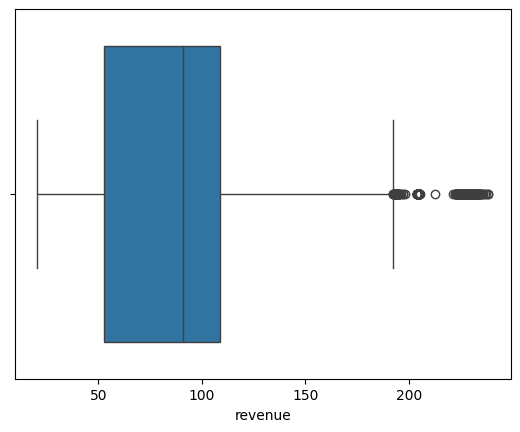

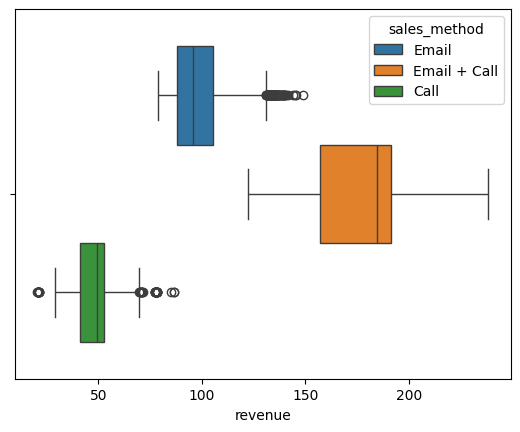

In [14]:
sns.boxplot(data=imputed_df, x="revenue")
plt.show()

sns.boxplot(data=imputed_df, x="revenue", hue="sales_method")
plt.show()

In [15]:
for method in imputed_df.sales_method.unique():
    mask = imputed_df.sales_method == method
    sub_revenue = imputed_df.loc[mask, "revenue"] 
    adjusted_revenue = adjust_outlier(sub_revenue)
    imputed_df.loc[mask, "revenue"]  = adjusted_revenue

In [16]:
validation(imputed_df)

All tests were passed!.


- **Summary**:
1. Missing Values: `revenue` Column: **7.16%** of the values were missing. These were imputed using Multiple Imputation by Chained Equations (MICE). 

1. `sales_method` Column: Inconsistencies: Variants such as 'em + call' and 'email' were corrected to 'Email + Call' and 'Email' respectively.

1. `years_as_customer` Column: Values outside the valid range (0-40 years) were corrected.

1. `week`, `nb_sold`, `nb_site_visits`, `state`: No issues found, values were within valid ranges and correctly formatted.

---

## `Data Visualization`

- **Tasks**
1. How many customers were there for each approach?
1. What does the spread of the revenue look like overall? And for each method?
1. Was there any difference in revenue over time for each of the methods?
1. Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

### How many customers were there for each approach?

In [17]:
customer_per_approach = imputed_df["sales_method"].value_counts()

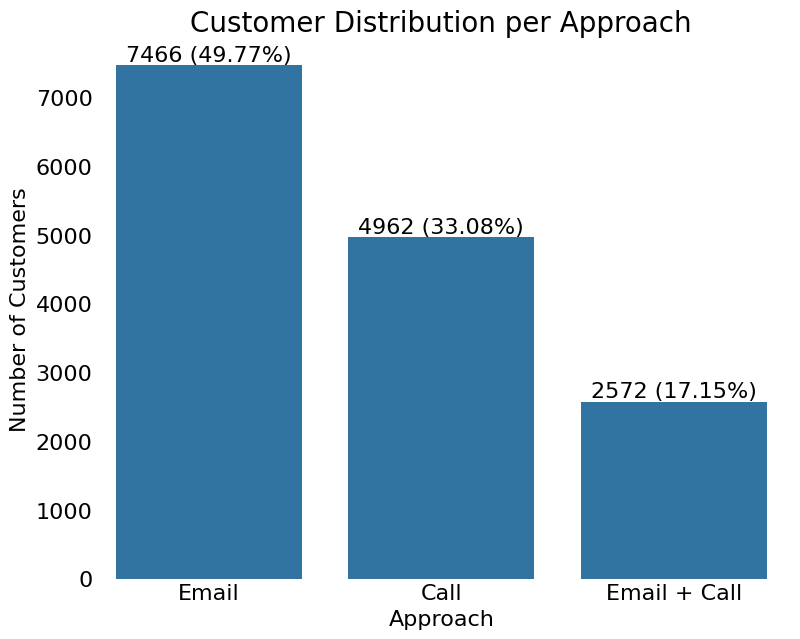

In [18]:
fig, ax = plt.subplots(figsize=(9, 7))

sns.barplot(customer_per_approach, ax=ax)

labels = customer_per_approach.astype(str) + \
imputed_df["sales_method"].value_counts(normalize=True).map(lambda x: " ({:.2%})".format(x))
ax.bar_label(ax.containers[0], labels, fontsize=16)

ax.set_title('Customer Distribution per Approach', fontsize=20)
ax.set_xlabel('Approach', fontsize=16)
ax.set_ylabel('Number of Customers', fontsize=16)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params("y", pad = 0)
ax.tick_params("both", length=0, labelsize=16)
plt.savefig('customer_distribution_combined.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

- **Number of Customers by Sales Method**
1. The number of customers reached via `Email` is **7,466 (50%)**.
1. `Call` comes second with **4,962 (33%)** customers.
1. The customers reached via `Email + Call` are **2,572 (17%)** customers.

### What does the spread of the revenue look like overall? And for each method?

In [19]:
revenue_spreadness = imputed_df["revenue"]\
.agg([range_, "mean", "median", "std", iqr, skewness]).round(2).to_frame().T\
.rename(index={"revenue": "total revenue"})
revenue_spreadness_by_approach = imputed_df.groupby("sales_method")["revenue"]\
.agg([range_, "mean", "median", "std", iqr, skewness]).round(2)
spreadness = pd.concat([revenue_spreadness_by_approach, revenue_spreadness])

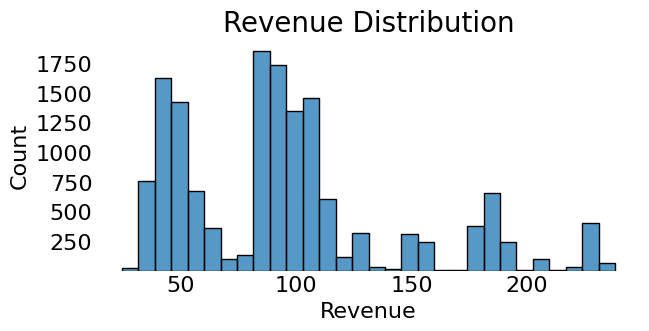


+------------------------------------------------------------------------------+



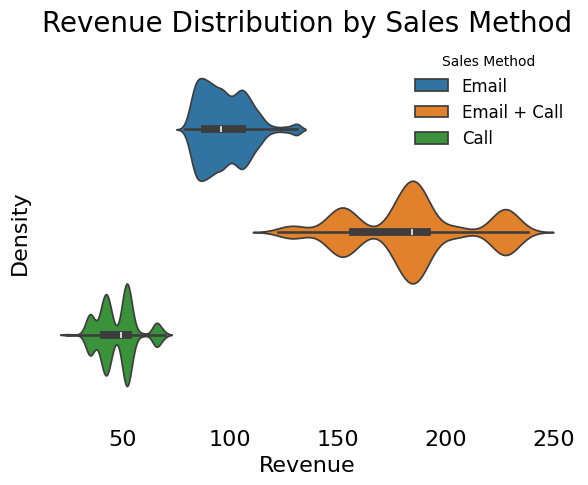

In [20]:
fig, ax = plt.subplots(figsize=(7, 3))

sns.histplot(data=imputed_df, x="revenue", bins=30, edgecolor='black', ax=ax)

ax.set_ylabel('Count', fontsize=16) 
ax.set_title('Revenue Distribution', fontsize=20) 
ax.set_yticks(ax.get_yticks()[1:-1])
ax.tick_params("both", length=0, labelsize=16)

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xlabel('Revenue', fontsize=16) 
ax.set_ylabel('Count', fontsize=16) 

ax.legend([], [], frameon=False)
ax.patch.set_alpha(0) 
plt.savefig('revenue_distribution_hist.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()
sep()
fig, ax = plt.subplots(figsize=(7, 5))

sns.violinplot(data=imputed_df, x="revenue", hue="sales_method", ax=ax)

ax.set_title('Revenue Distribution by Sales Method', fontsize=20) 
ax.set_xlabel('Revenue', fontsize=16) 
ax.set_ylabel('Density', fontsize=16) 
ax.set_yticks([])
ax.tick_params("both", length=0, labelsize=16)

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.legend(title='Sales Method', loc='upper right', frameon=False, fontsize=12) 
ax.patch.set_alpha(0) 

plt.savefig('revenue_distribution_violin.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [21]:
sep()
print("Revenue Statistics:")
display(spreadness.style.background_gradient(axis=0).format(precision=2))


+------------------------------------------------------------------------------+

Revenue Statistics:


,range,mean,median,std,iqr,skewness
Call,45.24,47.56,49.26,8.86,11.31,0.39
Email,52.30,97.38,95.80,11.13,17.19,0.71
Email + Call,116.21,183.31,184.46,27.84,34.08,0.09
total revenue,213.90,95.64,90.70,48.01,55.86,1.01


- **`Revenue Distribution`**
1. The revenue distribution is **positively** skewed with a skewness value of 1. This indicates that the distribution has a longer tail on the right.
1. The histogram of revenue shows a multimodal distribution with modes around 40-55 USD, 80-95 USD, and 180-190 USD.

- **`Revenue by Method`**
1. `Call`: **Slightly skewed** with skewness value of 0.4.
1. `Email`: **moderately skewed** with skewness value of 0.7.
1. `Email + Call`: Shows **no skewness** with a skewness value of 0.1.

- The violin plot indicates that the major modes in the revenue distribution arise from the distribution of each group. 
    - It helps to highlight the variations in revenue across different contact methods.

>skewness is computed as Fisher-Pearson coefficient of skewness.

### Was there any difference in revenue over time for each of the methods?

In [22]:
method_vs_time = imputed_df.groupby(["sales_method", "week"])["revenue"].agg("sum").to_frame()
method_vs_time_pivot = imputed_df.pivot_table(index="week", columns="sales_method", 
                                              values="revenue", aggfunc="sum", 
                                              margins="sum", margins_name="Total")


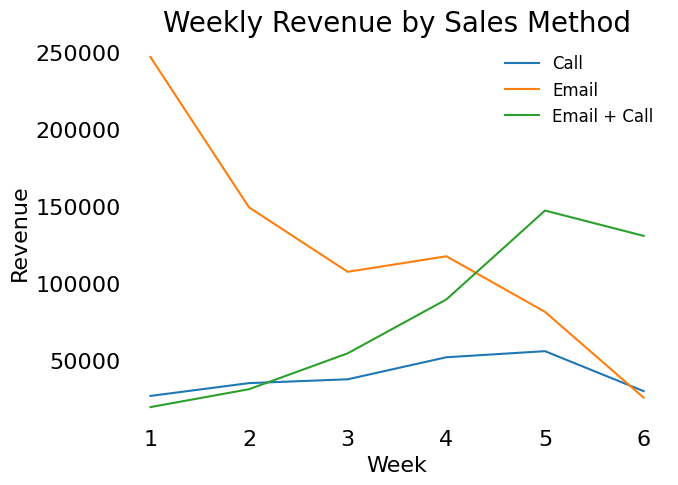

In [23]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.lineplot(data=method_vs_time, x="week", y="revenue", hue="sales_method", hue_order=["Call", "Email", "Email + Call"], ax=ax)

ax.set_title('Weekly Revenue by Sales Method', fontsize=20)
ax.set_xlabel('Week', fontsize=16)
ax.set_ylabel('Revenue', fontsize=16)

ax.tick_params("both", length=0, labelsize=16)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.patch.set_alpha(0) 

ax.legend(frameon=False, fontsize=12)

plt.savefig('revenue_time(week)_by_approach.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [24]:
sep()

print("Weekly Revenue Table\n\
Here is the detailed breakdown of revenue by sales method and week:")
method_vs_time_pivot.style.background_gradient(axis=0, subset=(method_vs_time_pivot.index[:-1],
                                                              method_vs_time_pivot.columns[:]))\
.format(precision=0, thousands=",")


+------------------------------------------------------------------------------+

Weekly Revenue Table
Here is the detailed breakdown of revenue by sales method and week:


sales_method,Call,Email,Email + Call,Total
week,,,,
1,"26,603","246,739","19,345","292,688"
2,"34,918","149,045","30,960","214,922"
3,"37,402","107,225","54,284","198,911"
4,"51,719","117,336","89,274","258,330"
5,"55,666","81,214","147,032","283,913"
6,"29,708","25,488","130,583","185,779"
Total,"236,016","727,047","471,479","1,434,542"


- **Trends and Insights**
1. `Email`:
    - Trend: There is a rapid revenue increase in the first week, followed by a sharp decline with slight growth in weeks 4.
    - Investigation Needed: Investigate if initial promotions or campaigns led to high early revenue and understand the reasons for the subsequent decline.
1. `Call`:
    - Trend: Revenue shows steady performance with slight growth in weeks 4 and 5.
    - Investigation Needed: Explore factors contributing to the steady performance and the reasons for growth in specific weeks.
1. `Email + Call`:
    - Trend: Revenue grows from weeks 2 to 5, followed by a decline.
    - Investigation Needed: Analyze the combined effect of both methods and the reasons behind the decline after week 5.

- **Week 6 Decline**:
    - Trend: Revenue declines across all methods in week 6.
    - Investigation Needed: Check for external factors or seasonal effects that might be impacting revenue in week 6.

In [25]:
avg_revenue = imputed_df.pivot_table(index="week", columns="sales_method", values="revenue")
avg_growth = avg_revenue.diff(axis=0)
avg_growth.loc[1, :] = avg_revenue.loc[1, :].copy()

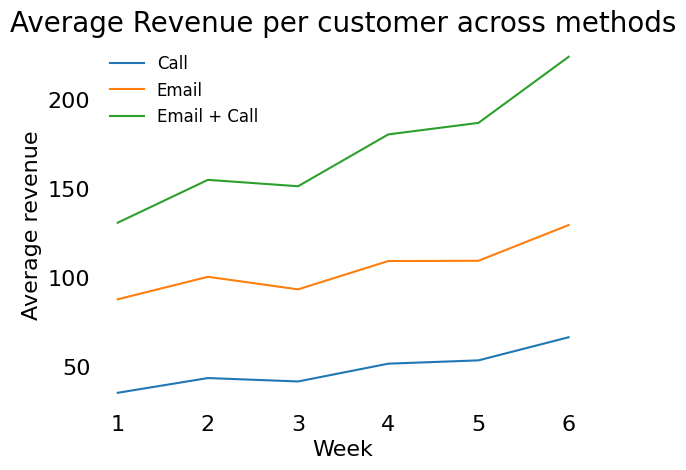

In [26]:
ax = sns.lineplot(data=imputed_df.groupby(["week", "sales_method"])["revenue"].mean().reset_index(), x= "week", y="revenue", hue="sales_method", hue_order=["Call", "Email", "Email + Call"])

plt.title("Average Revenue per customer across methods", fontsize=20)
plt.xlabel("Week", fontsize=16)
plt.ylabel("Average revenue", fontsize=16)
ax.tick_params("both", length=0, labelsize=16)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.patch.set_alpha(0) 

ax.legend(frameon=False, fontsize=12)

plt.savefig('average_revenue_by_approach_vs_time(week).png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [27]:
sep()
print("Average Revenue Growth\n\
The following table shows the average weekly growth in revenue for each method:" )
display(avg_growth.style.background_gradient(axis=0, subset=(avg_growth.index[1:], avg_growth.columns)).format(precision=2))


+------------------------------------------------------------------------------+

Average Revenue Growth
The following table shows the average weekly growth in revenue for each method:


sales_method,Call,Email,Email + Call
week,,,
1,35.10,87.65,130.71
2,8.28,12.65,24.09
3,-1.91,-7.06,-3.59
4,10.00,15.91,29.14
5,1.86,0.16,6.47
6,12.99,20.07,37.16


- **Summary**
    1. The average revenue per week indicates that all methods show an increase in average revenue over time.
    1. The average revenue growth is higher for `Email + Call` compared to `Email` alone, and `Email` has a higher growth compared to `Call`.

- This analysis suggests that the combined method of `Email + Call` results in the highest average revenue growth, with a notable increase in total revenue compared to the other methods.
- `Call` shows  the most consistent high growth rates, making it a strong candidate for continued use if maximizing growth is the priority.
- `Email + Call` is a viable option, if meant to balance total revenue reach and growth while managing resources efficiently.

---

## Based on the data, which method would you recommend we continue to use? 
- Some of these methods take more time from the team so they may not be the best for us to use if the results are similar.

**Given the analysis:**

- **Revenue and Growth:**
  - **`Email + Call`** method has the highest average revenue and total average revenue growth. Despite the higher time investment, the revenue return justifies its use if the budget allows for it.
  - **Email Only** and **Call Only** methods show lower average revenue and growth. `Email` alone offers higher average revenue but lacks consistency. Call only provides steadiness but at a lower revenue return.

- **Time vs. Return:**
  - If the team’s time is a significant constraint, focusing on **Email Only** might be a reasonable compromise. It requires less time than **`Email + Call`** and still provides a decent average revenue, though it lacks the consistency and higher revenue of **`Email + Call`**.

### Final Recommendation
- **Primary Recommendation:** Continue with the **`Email + Call`** method for its superior revenue results and growth potential. Ensure efficient use of resources by optimizing the process where possible.
- **Secondary Option:** If time constraints are severe, consider shifting to the **Email Only** method, which still yields substantial revenue with lower team effort. 

---

## Definition of a metric for the business to monitor

In [28]:
avg_revenue_per_customer = imputed_df.pivot_table(index="week", columns="sales_method", values="revenue", aggfunc="mean")
total_revenue = imputed_df.pivot_table(index="week", columns="sales_method", values="revenue", aggfunc="sum", margins="sum", margins_name="Total").drop("Total")
growth_rate  = (total_revenue / total_revenue.shift(1)).dropna() - 1


In [29]:
print("1. Average Revenue per Customer:")
display(avg_revenue_per_customer.style.background_gradient(axis=0).format(precision=2))
sep()
print("2. Revenue Growth Rate:")
display(growth_rate.style.background_gradient(axis=0).format(precision=2))
sep()

1. Average Revenue per Customer:


sales_method,Call,Email,Email + Call
week,,,
1,35.10,87.65,130.71
2,43.38,100.30,154.80
3,41.47,93.24,151.21
4,51.46,109.15,180.35
5,53.32,109.31,186.83
6,66.31,129.38,223.98



+------------------------------------------------------------------------------+

2. Revenue Growth Rate:


sales_method,Call,Email,Email + Call,Total
week,,,,
2,0.31,-0.40,0.60,-0.27
3,0.07,-0.28,0.75,-0.07
4,0.38,0.09,0.64,0.30
5,0.08,-0.31,0.65,0.10
6,-0.47,-0.69,-0.11,-0.35



+------------------------------------------------------------------------------+



### **Definition of Metrics for the Business to Monitor**


1. **Average Revenue per Customer**
1. **Revenue Growth Rate**

#### 1. **Average Revenue per Customer**

- **Description:** Measures the average revenue generated from each customer, providing insight into the effectiveness of each sales approach.
- **Formula:** 
  $$\text{Average Revenue per Customer} = \frac{\text{Total Revenue}}{\text{Number of Customers}}$$
- **Monitoring:** Track this weekly for each sales method to understand customer value over time.
- Initial values for `Call`, `Email`, and `Email + Call` are **\$66.31, \$129.38, \$223.98** respectively.

#### 2. **Revenue Growth Rate**

- **Description:** Indicates the rate at which revenue is increasing or decreasing over time, helping to assess the success of sales methods and identify trends.
- **Formula:**
  $$\text{Revenue Growth Rate} = \frac{\text{Revenue in Current Period}}{\text{Revenue in Previous Period}} -1\$$
- **Monitoring:** Monitor this weekly to observe revenue trends and adjust strategies accordingly.
- The metric magnitude reflects the severity of the trend, and the sign indicates whether it is beneficial for the firm.
- Current values for `Call`, `Email`, and `Email + Call` are **-0.47, -0.69, -0.11** respectively, indicate that a severe decline in `Call` and `Email` methods revenue with slight decline in `Call + Email` method.

---

## Final summary including recommendations that the business should undertake

### **Final Summary**
The analysis of the sales data revealed several key insights:

1. **Sales Methods Performance**:
   - **Email Only**: Generated the highest number of customers (7,466) and had a consistent average revenue per customer of approximately (\$97.4). However, the revenue growth was inconsistent, with a notable decline after the initial weeks.
   - **Call Only**: Attracted (4,962) customers with an average revenue per customer of (\$47.6). This method exhibited steady performance with consistent growth, especially in weeks 4 and 5. However, it had the lowest average revenue compared to the other methods.
   - **Email + Call**: Although it reached the fewest customers (2,572), it achieved the highest average revenue per customer at (\$183.3). The revenue from this method grew consistently over the weeks, peaking in week 5. This method combines the personalized engagement of calls with the efficiency of emails.

1. **Revenue Distribution**:
   - The revenue distribution is positively skewed, indicating that while most transactions are of lower value, there are significant high-value outliers. The Email + Call method contributed most to the higher revenue figures.

1. **Trends Over Time**:
   - Revenue generally increased for `Call` and `Email + Call` methods during the first five weeks, with a noticeable drop in week 6 across all methods. This suggests potential external factors or seasonality impacting revenue in the final week.

1. **Imputation and Data Cleaning**:
   - The missing revenue data (7.16%) was successfully imputed using MICE. 
   - Inconsistent entries in the `sales_method` and `years_as_customer` columns were corrected, ensuring the data was accurate for analysis.

1. **Metrics**:
    1. **Average Revenue per Customer**: to assess the effetiveness of the sales method.
    2. **Revenue Growth Rate**: to assess the success of sales method and identify trends.

### **Recommendations**
   - **Focus on the Email + Call Method**: This method yields the highest average revenue and total revenue growth. Despite requiring more time from the team, the significant return on investment justifies its continued use. Optimizing the process to reduce time per interaction could further enhance its effectiveness.

### **Further Investigation**:
   - **Analyze Week 6 Decline**: Investigate the factors leading to the revenue drop in week 6 across all methods. Understanding this decline could help mitigate similar issues in future campaigns.

---